Import the Math library which we use later to find the square root

In [1]:
import math

In below cell we are accepting our first input which is rows and columns enter the rows and columns as x,y and press enter.
example if you want to have 3 rows and 3 columns just run the cell and type 3,3 and press enter key

In [2]:
#Lets take the number of rows and columns from the user.
print("Enter Rows and Columns\njust type m,n and press enter ex:3,3 and enter")
rows,columns=tuple(map(int,input().split(',')))

Enter Rows and Columns
just type m,n and press enter ex:3,3 and enter
3,3


Displaying the Rows value

In [3]:
rows

3

Displaying the column values

In [4]:
columns

3

Now we are taking the second input from the user which is corner points, so we gonna take 4 corner points. Example of how to enter the corner points are if you want to enter (1,1),(3,1),(1,3) and (3,1) follow these steps, run the cell and when the input bar pops up type 1,1 press enter key then type 3,1 press enter key then type 1,3 then press enter key then type 3,1 then press enter key

In [5]:
#lets take the corner points from user.
print("Enter Corner points\njust type x,y and press enter")
corners=[]
for i in range(4):
    corners.append(tuple(map(float,input().split(','))))

Enter Corner points
just type x,y and press enter
1,1
3,1
1,3
3,3


I am taking the pixels list and copying the first corner to the pixel which we later use it to finding the remaining pixels

In [6]:
corners
pixels = corners[0:1]

Displaying the pixels value

In [7]:
pixels

[(1.0, 1.0)]

Displaying the corners this is just for seeing the corner values

In [8]:
print("Entered Corner points\n")
for (x,y) in corners:
    print(x,y)

Entered Corner points

1.0 1.0
3.0 1.0
1.0 3.0
3.0 3.0


The cell below is find the distance between the two horizontal corner points(corner 1 and 2) through which we can get an idea of
how much distance is need in between the columns to make them evenly spaced.

In [9]:
# lets find the distance between the points on x-axis and y-axis
column_distance = math.sqrt(pow((corners[1][0]-corners[0][0]),2)+pow((corners[1][1]-corners[0][1]),2))

Displaying the Total Column Distance

In [10]:
column_distance

2.0

The cell below is find the distance between the two vertical corner points(corner 1 and 3) through which we can get an idea of how much distance is need in between the rows to make them evenly spaced.

In [11]:
row_distance = math.sqrt(pow((corners[2][0]-corners[0][0]),2)+pow((corners[2][1]-corners[0][1]),2))

Displaying the Total row distance

In [12]:
row_distance

2.0

Now we are calculating the actual distance between the pixels to get them evenly spaced

In [13]:
#Now we need to calculate the distance to distribute the pixels evenly.for example if we need them to be divded to n rows
#and m columns then we need to divide the distance into n-1 and m-1 parts to evenly space the pixels.
row_pixel_dist=round((row_distance/(rows-1)),2)
col_pixel_dist=round((column_distance/(columns-1)),2)    

Displaying the Row Pixel distance and column pixel distance

In [14]:
print("rowpixel distance:",row_pixel_dist)
print("columnpixel distance:",col_pixel_dist)

rowpixel distance: 1.0
columnpixel distance: 1.0


The below function is to add the column distance to the x coordinate.

In [15]:
def add_pixel(x,y):
    return round(x+col_pixel_dist,2),y

In below cell we are calculating the first row values by adding the column pixel distance to the first corner. we are looping this for columns-2 times as we already have the first and second corners and rest we need are the middle points.
Example of how this functions for the corners (1,1),(3,1),(1,3),(3,3), here our first corner (1,1) is taken in to pixels and we caluclated the row pixel distance and column pixel distance both values are 1 as we want to divide them to 3*3 grid. so we add the column distance to the x coordinate of first corner (1+1,1) we get (2,1) and append that to pixel, now the pixels has (1,1),(2,1) and after the loops gets fininshed we are extending the pixels by adding the second corner so the pixels get updated to (1,1),(2,1),(3,1) therefore we got our first row coordinates from below cell.

In [16]:
temp=pixels[0]
for i in range(columns-2):
    pixels.append(tuple(map(float,(add_pixel(temp[0],temp[1])))))
    temp=pixels[-1]
pixels.extend(corners[1:2])

Displaying the pixels techincally the first row.

In [17]:
pixels

[(1.0, 1.0), (2.0, 1.0), (3.0, 1.0)]

In the below cell for the first row values we are adding row pixel distance to the y coordinates and building up the next row. This process continues for row-1 times as we already have one row. Example of how this works for the same corners we have pixels as (1,1),(2,1),(3,1) so we take pixels[-columns::] to temp(this means we are taking the columns number of values from pixels in backward direction i.e. we get the previous row values to temp). for first time we get (1,1),(2,1),(3,1) to temp now in temp we keep on adding the row pixel distance to y coordinate and we are rounding that value to 2 decimal points.

In [18]:
for i in range(rows-1):
    temp = pixels[-columns::]
    for (x,y) in temp:
        pixels.append(tuple(map(float,(x,round((y+row_pixel_dist),2)))))

Displaying the pixel grid.

In [19]:
print("pixels points are:\n",pixels)

pixels points are:
 [(1.0, 1.0), (2.0, 1.0), (3.0, 1.0), (1.0, 2.0), (2.0, 2.0), (3.0, 2.0), (1.0, 3.0), (2.0, 3.0), (3.0, 3.0)]


In [20]:
import matplotlib.pyplot as plt

Plotting all the pixel points using scatter plot.

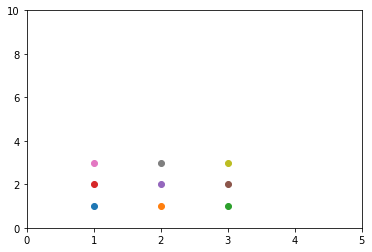

In [21]:
for i in range(rows*columns):
    plt.scatter(pixels[i][0],pixels[i][1])
plt.axis([0,5,0,10])
plt.show()